# Adding Data to a Map

First, apply the streets and satelliteStreets map styles used for the GeoJSON polygon mapping. Change the text for the maps on the base layer to read as "Streets" and "Satellite" to look like the following:

In [ ]:
// Create a base layer that holds both maps.
let baseMaps = {
  "Streets": streets,
  "Satellite": satelliteStreets
};

Change the center of our map to the geographic center of the United States using the coordinates [39.5, -98.5], with a zoom level of 3 and default layer streets. Our logicStep1.js file should look like the following:

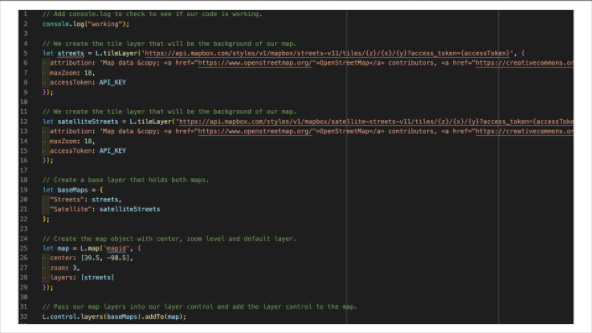

Add the USGS URL for earthquake data by following these steps:

From the USGS home page  click the Earthquakes  link:



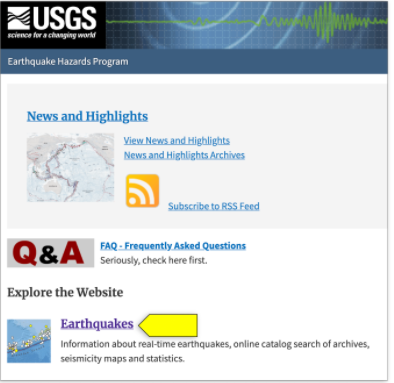

Next, click the Real-time Notifications, Feeds, and Web Services  link

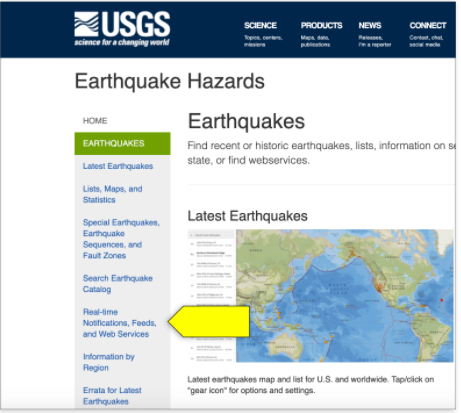

Scroll down until you see "GeoJSON Summary Feed".

Click the GeoJSON Summary Feed link:

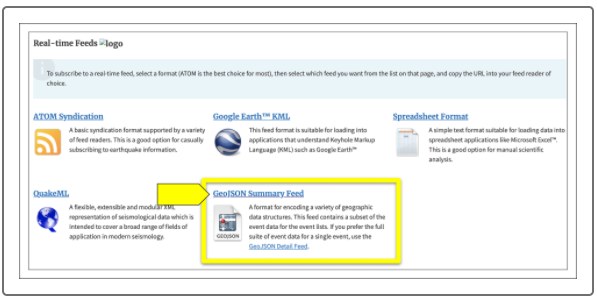

On the right-hand side, click the All Earthquakes link under the "Past 7 Days" heading:



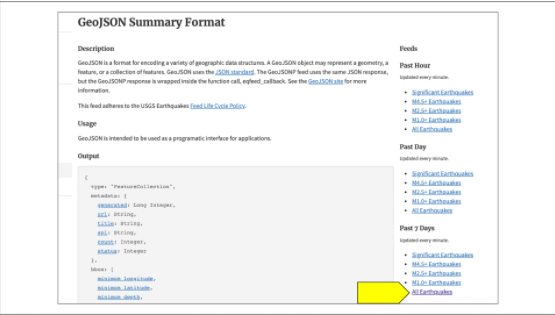

The GeoJSON data will launch in your browser:

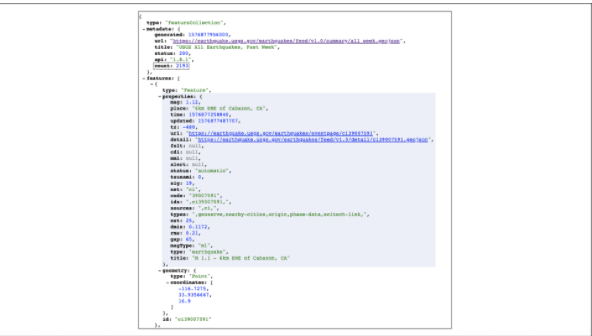

If we look closer at the geometry object, we'll see an additional data point in the coordinates object, 3.91, which is the depth of the earthquake in kilometers:

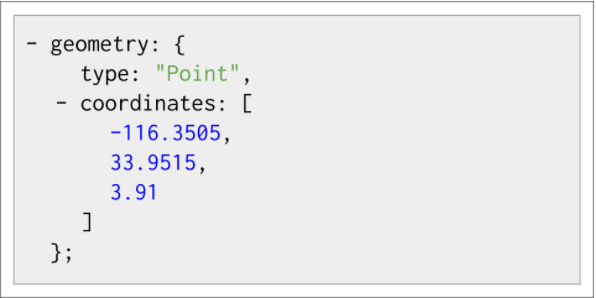

Copy the URL for the earthquake JSON data recorded for the past seven days, and add it in place of the previous URL in the d3.json() method. It should look like the following:

In [ ]:
// Retrieve the earthquake GeoJSON data.
d3.json("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_week.geojson").then(function(data) {
  // Creating a GeoJSON layer with the retrieved data.
  L.geoJson(data).addTo(map);
});

After saving the logicStep1.js file and opening the index.html file in your browser, the map should look like the following. Make sure you are referring to the correct logic file in your index.html file:

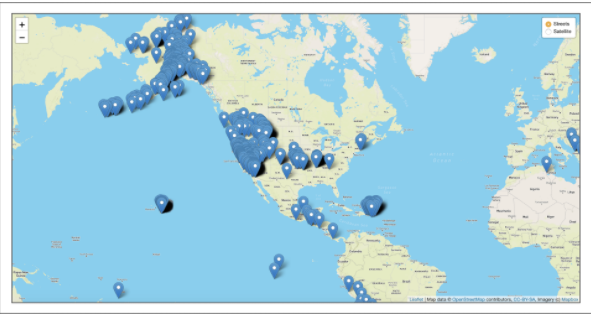

## Add Style to the Map

After styling and modifying the radius of the circle for each earthquake's magnitude, our map should look similar to the following map:

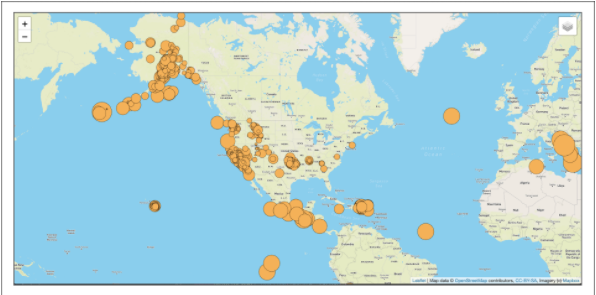

Before we write the code to create this map, make a copy of the logicStep1.js file and name it logicStep2.js. Now let's edit the file.

First, we'll change the basic marker to a circleMarker by using the pointToLayer function.

### REWIND
For the pointToLayer callback function, the basic syntax for adding functionality to a marker is:

In [ ]:
L.geoJson(data, {
pointToLayer: function(feature, latlng) {
return L.marker(latlng);
}
});

For our purposes, we'll use circleMarker instead of marker in the above code. Edit your GeoJSON layer code to look like the following:

In [ ]:
// Creating a GeoJSON layer with the retrieved data.
  L.geoJson(data, {

// We turn each feature into a circleMarker on the map.

pointToLayer: function(feature, latlng) {
            console.log(data);
            return L.circleMarker(latlng);
        },
    }).addTo(map);
});

Save the file and let's see what the data looks like on the map. The index.html file should look like the following:

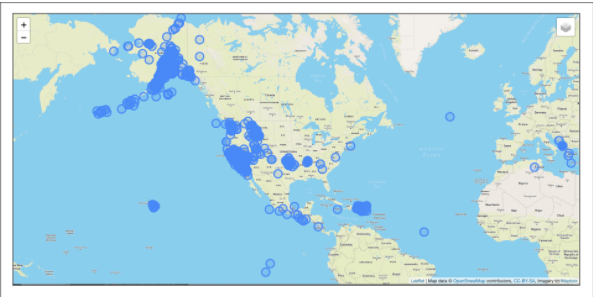

Next, we'll create a style for each earthquake by adjusting the line color, fill color, opacity, fill opacity, stroke, weight, and radius.

### REWIND
When we defined the line style for the nonstop flight routes from Toronto, we created a style variable like the following:

In [ ]:
let myStyle = {
color: "#ffffa1",
weight: 2
}

We'll create a function styleInfo(), which will contain all the style parameters for each earthquake plotted. Within this function, we'll create a getRadius() function to calculate the radius for each earthquake.

Add the following function styleInfo() inside the d3.json() method:

In [ ]:
// This function returns the style data for each of the earthquakes we plot on
// the map. We pass the magnitude of the earthquake into a function
// to calculate the radius.
function styleInfo(feature) {
  return {
    opacity: 1,
    fillOpacity: 1,
    fillColor: "#ffae42",
    color: "#000000",
    radius: getRadius(),
    stroke: true,
    weight: 0.5
  };
}

Let's review the style we're creating for each earthquake:

In the styleInfo() function, we passed the argument feature to reference each object's features.

The opacity and fillOpacity are set at 1, the stroke is "true," and the weight is 0.5.

The fillColor is light orange, and the color is "#000000" (black).

The getRadius() function retrieves the earthquake's magnitude. Next, we'll create the getRadius() function to calculate the radius of the circle from the magnitude.


In the getRadius() function for our styleInfo() function, add the following code to retrieve the earthquake's magnitude: feature.properties.mag.

Next, we'll create the getRadius() function. Add the following code below the styleInfo() function:

In [ ]:
// This function determines the radius of the earthquake marker based on its magnitude.
// Earthquakes with a magnitude of 0 will be plotted with a radius of 1.
function getRadius(magnitude) {
  if (magnitude === 0) {
    return 1;
  }
  return magnitude * 4;
}

In the getRadius() function, we'll pass the magnitude argument that will reference the feature.properties.mag in the styleInfo() function. Then we'll use a conditional statement that sets the magnitude to 1 if the magnitude of the earthquake in the JSON file is 0 so that the earthquake is plotted on the map. If the magnitude is greater than 0, then the magnitude is multiplied by 4.

Now, that we created our style, let's add it to the map.

To add style to the L.geoJson() layer, the style key will be assigned to the styleInfo function we created. Make sure the code for your L.geoJson() layer looks like the following:

In [ ]:
// Creating a GeoJSON layer with the retrieved data.
  L.geoJson(data, {

// We turn each feature into a circleMarker on the map.

pointToLayer: function(feature, latlng) {
            console.log(data);
            return L.circleMarker(latlng);
        },
      // We set the style for each circleMarker using our styleInfo function.
    style: styleInfo
    }).addTo(map);
});

When you save your logicStep2.js file and open  index.html in your browser, your map will look like the following:

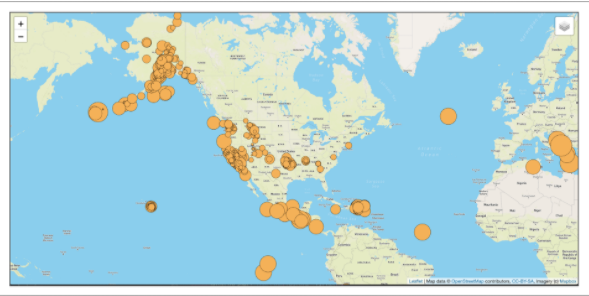

## Add Color and a Popup to the Map

After we're done adding a color range for the magnitude and a popup for each earthquake, our map should look like the following:

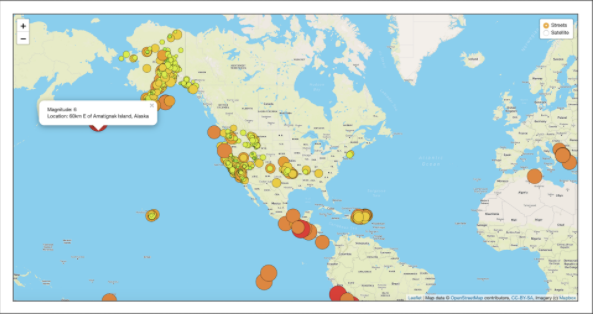

Before we write the code to create this map, make a copy of the logicStep2.js file and name it logicStep3.js. Now let's edit the file.

First, we'll create a fill-color range for the magnitude. In the styleInfo() function, our fillColor was set with fillColor: "#ffae42". We'll replace the hexadecimal color code with the function getColor(). Inside the parentheses, we'll add the dot notation code to get the magnitude as we did for the getRadius() function, since we'll change the color of each earthquake marker based on the magnitude.

Add the getColor(feature.properties.mag) function for the fillColorso that our styleInfo() function looks like the following:

In [ ]:
// This function returns the style data for each of the earthquakes we plot on
// the map. We pass the magnitude of the earthquake into two separate functions
// to calculate the color and radius.
function styleInfo(feature) {
  return {
    opacity: 1,
    fillOpacity: 1,
    fillColor: getColor(feature.properties.mag),
    color: "#000000",
    radius: getRadius(feature.properties.mag),
    stroke: true,
    weight: 0.5
  };
}

Now we need to write code for the getColor() function to change the marker's color based on the magnitude. For example, if the magnitude is greater than 5, it will be a certain color, if the magnitude is greater than 4, it will be a different color, and so on.

For the getColor() function, we'll write a conditional expression with logical operators for the magnitudes. Add the following getColor() function below the styleInfo() function and above the getRadius() function. Sadhana suggests using the following colors for the magnitudes since they'll be visible on the Satellite map:

In [ ]:
// This function determines the color of the circle based on the magnitude of the earthquake.
function getColor(magnitude) {
  if (magnitude > 5) {
    return "#ea2c2c";
  }
  if (magnitude > 4) {
    return "#ea822c";
  }
  if (magnitude > 3) {
    return "#ee9c00";
  }
  if (magnitude > 2) {
    return "#eecc00";
  }
  if (magnitude > 1) {
    return "#d4ee00";
  }
  return "#98ee00";
}

Let's save our logicStep3.js file and open the index.html file in the browser to confirm our code is working. When we select the dark map, our map should look similar to the following map:

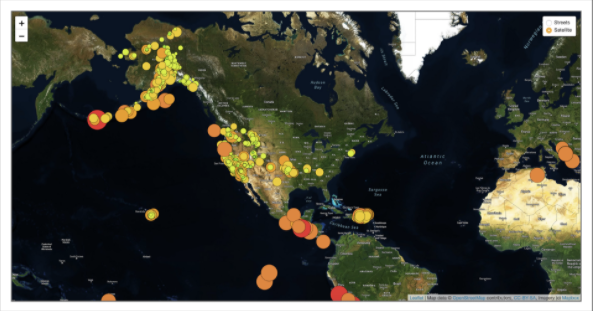

Now we need to edit the GeoJSON layer code to add the popup for the magnitude and location.

In the geoJson layer, we'll add the onEachFeature function to add a popup for each circle marker. Edit the L.geoJson() layer code to include the onEachFeature function with the bindPopup() method:

In [ ]:
// Creating a GeoJSON layer with the retrieved data.
L.geoJson(data, {
    // We turn each feature into a circleMarker on the map.
    pointToLayer: function(feature, latlng) {
        console.log(data);
        return L.circleMarker(latlng);
      },
    // We set the style for each circleMarker using our styleInfo function.
  style: styleInfo,
    // We create a popup for each circleMarker to display the magnitude and
    //  location of the earthquake after the marker has been created and styled.
    onEachFeature: function(feature, layer) {
    layer.bindPopup("Magnitude: " + feature.properties.mag + "<br>Location: " + feature.properties.place);
  }
}).addTo(map);

When you save the logicStep3.js file and open your index.html file in your browser, the Satellite map option will look like the following:

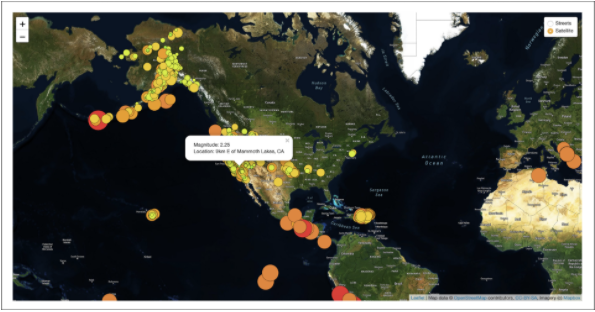

## Adding Data as an Overlay

After adding an overlay for the earthquakes, our map should look similar to the following map, allowing the viewer to toggle off and on the earthquake data. The default setting will always show the data:

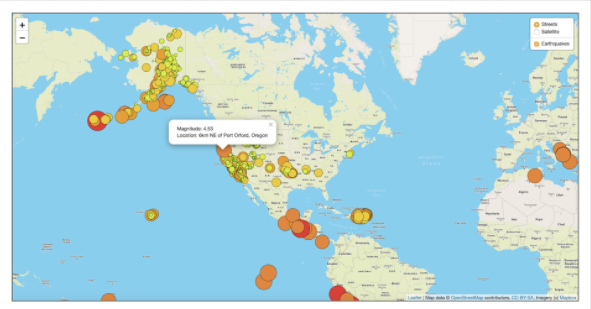

Before we write the code to create this map, make a copy of the logicStep3.js file and name it logicStep4.js. Now, let's edit the file.

Refer to Layer Groups and Layers Control for guidance on how to add data as an overlay to the map.

### NOTE
The base layers or tile layers, the Streets and Satellite, are mutually exclusive, and only one can be visible at a time on our map. Whereas, overlays are anything that you want to add to the map, which are "laid over" all the base layers and are visible all the time.

In the example below, from the Layer Groups and Layers Control page, we can add data to a LayerGroup class. In the example given, the cities variable is assigned to the layerGroup(). For our purposes, we'll use the earthquake data:

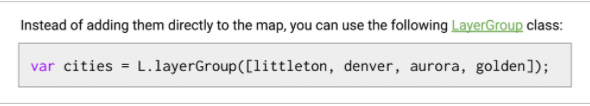

Let's create an overlay layer for our earthquake data. Add the following code to your logicStep4.js file below the code for the base layer that holds the two different map styles:

In [ ]:
// Create the earthquake layer for our map.
let earthquakes = new L.layerGroup();

Next, define the overlay object to add it to the map. Add the following code below the earthquake layer group:

In [ ]:
// We define an object that contains the overlays.
// This overlay will be visible all the time.
let overlays = {
  Earthquakes: earthquakes
};

To add the overlay to the map, add the variable overlays to the Layers Control object. Edit the Layers Control object so that the overlays object will show up on the tile layers control:

In [ ]:
// Then we add a control to the map that will allow the user to change
// which layers are visible.
L.control.layers(baseMaps, overlays).addTo(map);

Your logicStep4.js file should look like the following with the added code:

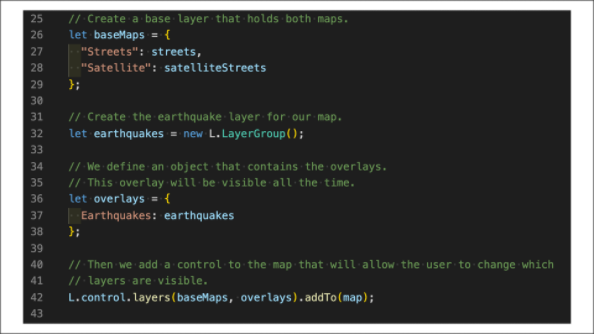

If we open the index.html file in our browser, we see that the earthquake data has loaded, but the earthquake overlay button is not on:

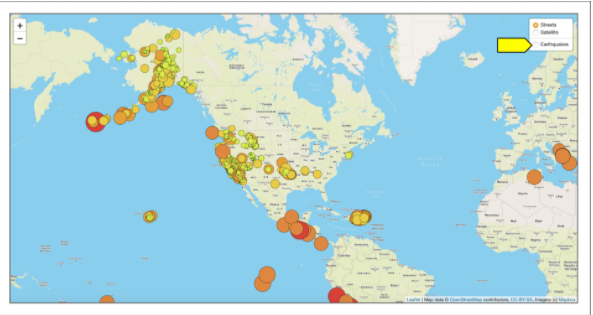

Our L.geoJSON() layer code looks like this at this point:

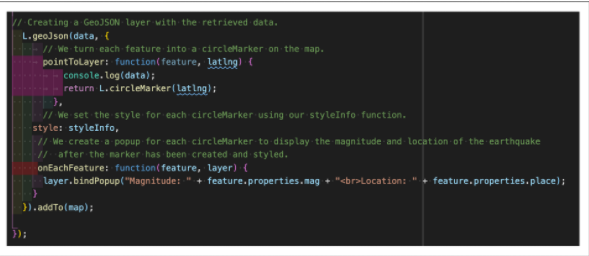

To have the Earthquakes overlay button "on," we need to:

Replace the map variable in the addTo(map) function with earthquakes.

Before the closing bracket and parenthesis of the d3.json()method we add the earthquake layer to the map, with earthquakes.addTo(map);.

Edit your addTo(map) function at the end of your L.geoJSON() layer code, as shown in the image to look like the following:

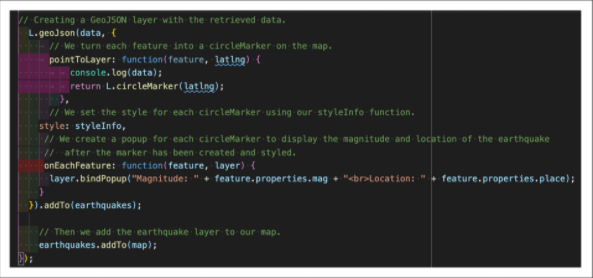

Now, when we open the index.html file in our browser, we can see that the earthquake data has loaded and the earthquake overlay button is "on":

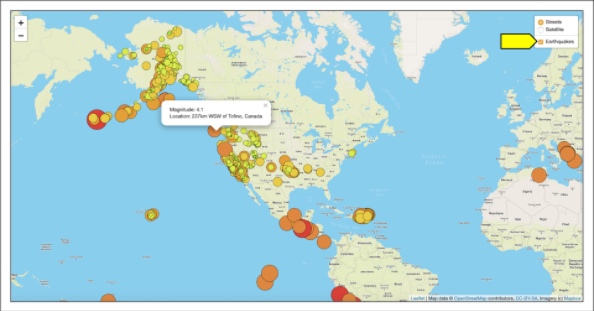

## Add a Legend to the Map

After we add a legend, our earthquake map should look similar to the following map, with the legend at the bottom right of the map:

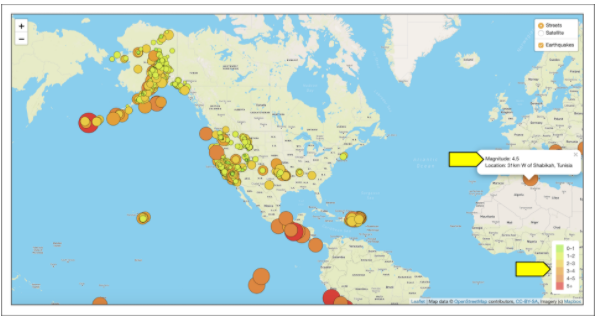

you that we can use the Leaflet choropleth examples page (Links to an external site.) to help us write the code for the legend. On the choropleth examples page, scroll down to the "Custom Legend Control" section:

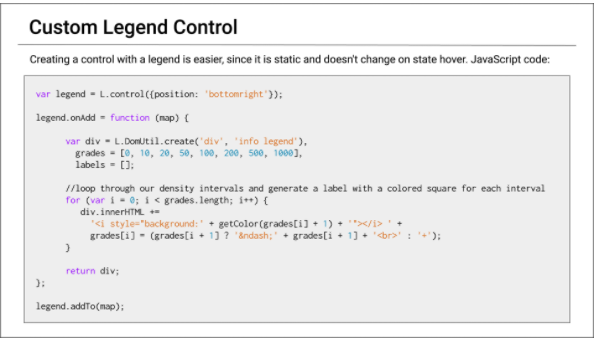

Before we write the code to create this map, make a copy of the logicStep4.js file and name it logicStep5.js. Now let's edit the file.

On the choropleth examples page, copy the code for the Custom Legend Control and paste it below the L.geoJSON() layer, where we add the earthquake layer to the map, earthquakes.addTo(map). Now, we'll edit the legend control object to suit our needs.

First, edit the code for the Leaflet control() object to look like the following. With this code, we'll place the legend at the indicated position—the bottom right:

In [ ]:
// Create a legend control object.
let legend = L.control({
  position: "bottomright"
});

Next, remove the argument "map" from the legend function to look like the following:

In [ ]:
// Then add all the details for the legend.
legend.onAdd = function() {
  let div = L.DomUtil.create("div", "info legend");
};

With this code, we're going to add a legend to the map with legend.onAdd. The legend will be added to a div element on the index.html file using the DomUtil utility function.

Next, we're going to change the grades array in the Leaflet documentation to a magnitudes array, and we'll add a colors array that holds the colors for our magnitudes. Add the following code inside our legend.onAdd function:

In [ ]:
const magnitudes = [0, 1, 2, 3, 4, 5];
const colors = [
  "#98ee00",
  "#d4ee00",
  "#eecc00",
  "#ee9c00",
  "#ea822c",
  "#ea2c2c"
];

The final piece is to edit the for loop. The for loop will add the color choices from our colors array as a small box for the color of earthquakes and place the text of the magnitude range next to the box. Edit the for loop code to look like the following:

In [ ]:
// Looping through our intervals to generate a label with a colored square for each interval.
   for (var i = 0; i < magnitudes.length; i++) {
     console.log(colors[i]);
     div.innerHTML +=
       "<i style='background: " + colors[i] + "'></i> " +
       magnitudes[i] + (magnitudes[i + 1] ? "&ndash;" + magnitudes[i + 1] + "<br>" : "+");
  }
   return div;
 };

 legend.addTo(map);

Let's review what's happening in this for loop:

After we iterate through the magnitudes, we'll add the color and text to the div element using div.innerHTML +=.
For each iteration, we'll add a color from the colors array by styling the background of an <i> tag with color options.
Next, we'll add the interval between earthquake magnitudes for our colors with the following code: magnitudes[i] + (magnitudes[i + 1] ? "&ndash;" + magnitudes[i + 1] + "<br>" : "+").

The last thing we need to do is style the legend using CSS. Below the JavaScript code for the legend is the CSS code. Copy the CSS code and add it our style.css file:

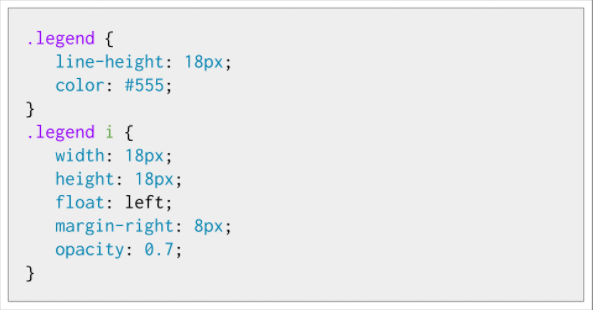

We won't edit the <i> tag of the .legend class (.legend i) in the style.css file, but let's edit our .legend class to create some padding around the legend, add a white background, and add a border radius. Edit your .legend class to look like the following:

In [ ]:
.legend {
  padding: 10px;
  line-height: 18px;
  color: #555;
  background-color: #fff;
  border-radius: 5px;
}

Our style.css file should now look like the following:

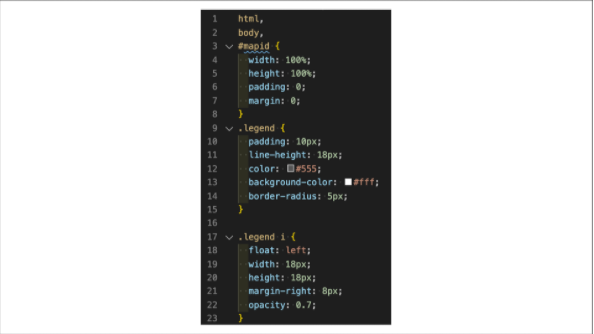

Save your logicStep5.js and style.css files. When you open index.html in your browser, your map should have a legend on the bottom right:

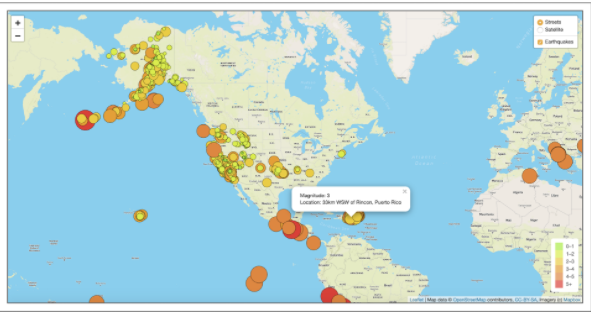